# 데이터 및 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import os

import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from geopy.distance import great_circle
import contextily as ctx # 실제 지도 위에 시각화하기 위한 라이브러리
from branca.colormap import linear # 컬러바 추가

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>")) # 주피터노트북 넓게 활용하기
plt.rc('font', family='NanumGothic') # 시각화 시 한글 표기
%matplotlib inline 

In [2]:
# 파일명 출력
file_list = os.listdir()
file_list

['.ipynb_checkpoints',
 'office_data.csv',
 'Office_Data_EDA.ipynb',
 'PBSS_Analysis.ipynb',
 'rentaloffice(2306).csv',
 'Rental_Data_EDA.ipynb',
 '공공자전거 대여소 정보(22.12월 기준).csv',
 '서울특별시 공공자전거 대여이력 정보_2207.csv',
 '서울특별시 공공자전거 대여이력 정보_2208.csv',
 '서울특별시 공공자전거 대여이력 정보_2209.csv',
 '서울특별시 공공자전거 대여이력 정보_2210.csv',
 '서울특별시 공공자전거 대여이력 정보_2211.csv',
 '서울특별시 공공자전거 대여이력 정보_2212.csv',
 '서울특별시 공공자전거 대여이력 정보_2301.csv',
 '서울특별시 공공자전거 대여이력 정보_2302.csv',
 '서울특별시 공공자전거 대여이력 정보_2303.csv',
 '서울특별시 공공자전거 대여이력 정보_2304.csv',
 '서울특별시 공공자전거 대여이력 정보_2305.csv',
 '서울특별시 공공자전거 대여이력 정보_2306.csv',
 '임시.txt',
 '참고논문']

In [3]:
# 시간 오래 걸림

data_2306 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2306.csv", encoding='cp949')
data_2305 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2305.csv", encoding='cp949')
data_2304 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2304.csv", encoding='cp949')
data_2303 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2303.csv", encoding='cp949')
data_2302 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2302.csv", encoding='cp949')
data_2301 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2301.csv", encoding='cp949')
data_2212 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2212.csv", encoding='cp949')
data_2211 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2211.csv", encoding='cp949')
data_2210 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2210.csv", encoding='cp949')
data_2209 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2209.csv", encoding='cp949')
data_2208 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2208.csv", encoding='cp949')
data_2207 = pd.read_csv("서울특별시 공공자전거 대여이력 정보_2207.csv", encoding='cp949')

In [4]:
# 시간 제법 걸림

data_list = [data_2306, data_2305, data_2304, data_2303, data_2302, data_2301, data_2212, data_2211, data_2210, data_2209, data_2208, data_2207]
data = pd.concat(data_list, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45656523 entries, 0 to 45656522
Data columns (total 16 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
dtypes: float64(1), int64(3), object(12)
memory usage: 5.4+ GB


In [5]:
data.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-57232,2023-06-01 00:00:04,4652,신사두산위브2차아파트 앞,0,2023-06-01 00:00:07,04652,신사두산위브2차아파트 앞,0,0,0.0,1961,\N,내국인,ST-2425,ST-2425
1,SPB-34772,2023-06-01 00:00:09,4162,노량진1동 청소년독서실,0,2023-06-01 00:00:11,04162,노량진1동 청소년독서실,0,0,0.0,1971,M,내국인,ST-2652,ST-2652
2,SPB-56834,2023-06-01 00:00:15,4886,배명고등학교 건너편,0,2023-06-01 00:00:29,04886,배명고등학교 건너편,0,0,0.0,1998,M,내국인,ST-2986,ST-2986
3,SPB-31592,2023-06-01 00:00:24,147,마포역 4번출구 뒤,0,2023-06-01 00:00:41,00147,마포역 4번출구 뒤,0,0,0.0,1996,\N,내국인,ST-205,ST-205
4,SPB-56197,2023-06-01 00:00:33,3517,용마사거리,0,2023-06-01 00:01:01,03517,용마사거리,0,0,0.0,\N,F,내국인,ST-1266,ST-1266


# 데이터 정제

- 분석에 필요 없는 컬럼 제거

- 컬럼 이름 변경

- 결측치 처리

- 중복 데이터 제거

- 데이터 형변환 (날짜, 정수형)

- 이상치 제거

In [6]:
data.drop(labels=['자전거번호', '대여거치대', '반납거치대', '생년', '성별', '이용자종류', '대여대여소ID', '반납대여소ID'], axis=1, inplace=True)

In [7]:
data.rename(columns = {'대여 대여소번호':'대여대여소번호', '대여 대여소명':'대여대여소명', '이용시간(분)':'이용시간', '이용거리(M)':'이용거리'}, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45656523 entries, 0 to 45656522
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일시     object 
 1   대여대여소번호  int64  
 2   대여대여소명   object 
 3   반납일시     object 
 4   반납대여소번호  object 
 5   반납대여소명   object 
 6   이용시간     int64  
 7   이용거리     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.7+ GB


### 결측치 탐색 및 제거

전체의 0.4% (192268건)에 해당하는 데이터의 반납 대여소 데이터가 누락되었다. 제거해준다.

In [9]:
# 결측치가 없는 것으로 보이나, object 형식으로 결측치가 입력되어 있는 것을 확인하였다.
data.isnull().sum() 

대여일시       0
대여대여소번호    0
대여대여소명     0
반납일시       0
반납대여소번호    0
반납대여소명     0
이용시간       0
이용거리       0
dtype: int64

In [10]:
data.replace('\\N', np.nan, inplace=True)

In [11]:
# 전체의 0.4%에 해당하는 데이터가 반납 대여소 데이터가 입력되지 않았다. 제거해준다.
data.isnull().sum()

대여일시            0
대여대여소번호         0
대여대여소명          0
반납일시            0
반납대여소번호    192268
반납대여소명     192268
이용시간            0
이용거리            0
dtype: int64

In [12]:
data[data['반납대여소번호'].isnull()].head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
2491,2023-06-01 00:32:14,2302,교보타워 버스정류장(신논현역 3번출구 후면),2023-06-01 00:48:29,NaN,NaN,14,1397.0
2704,2023-06-01 00:23:03,1651,상계동 우방유쉘아파트 앞,2023-06-01 00:52:35,NaN,NaN,7,771.0
3354,2023-06-01 00:45:27,242,신길선원가와인아파트 앞,2023-06-01 01:03:50,NaN,NaN,10,0.0
3781,2023-06-01 00:16:27,516,광진메디칼 앞,2023-06-01 01:11:42,NaN,NaN,30,4161.0
3787,2023-06-01 00:00:12,1642,서울여대 남문,2023-06-01 01:11:48,NaN,NaN,7,2938.0


In [13]:
data.dropna(axis=0, inplace=True)

### 중복 데이터 제거

In [14]:
data.duplicated().sum() 

62

In [15]:
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

### 데이터 형변환 
대여/반납일시 -> datetime, 대여소 번호-> int
 
- 효과적으로 대여/반납 일시에서 월, 요일, 시간대 등의 정보를 추출하기 위해 datetime 형식으로 변환한다. 
- 대여소 번호를 정수형으로 변환하지 않으면, 다섯자리 형태로 기재되어 있기 때문에 번호 매칭이 어렵다 (ex. 03112)

In [16]:
data['반납대여소번호'] = data['반납대여소번호'].astype(np.int64)

In [17]:
# data['대여일시'] = pd.to_datetime(data['대여일시'])

In [18]:
# datetime으로 형변환시 이상치 발견. 년도가 2323년이라 오류 발생 
data[data['대여일시'].str.contains('2323')]

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
4134434,2323-06-23 21:27:01,1448,코스트코 상봉점,2023-06-23 22:13:43,4024,꿈의숲 SK뷰 아파트,44,10050.26


In [19]:
# 단순히 잘못 기재된 데이터로 간주하여 연도만 수정
data.loc[4134434, '대여일시'] = '2023-06-23 21:27:01'

In [20]:
data['대여일시'] = pd.to_datetime(data['대여일시'])

In [21]:
data['반납일시'] = pd.to_datetime(data['반납일시'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45464193 entries, 0 to 45464192
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일시     datetime64[ns]
 1   대여대여소번호  int64         
 2   대여대여소명   object        
 3   반납일시     datetime64[ns]
 4   반납대여소번호  int64         
 5   반납대여소명   object        
 6   이용시간     int64         
 7   이용거리     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 2.7+ GB


### 이상치 제거

이용시간과 이용거리에 박스플롯 상 유난히 멀리 떨어진 이상점과 극단점이 다수인 것을 확인하였다.

- 이용시간의 경우, 최장 약 3500분으로(약 58시간) 반납을 잊었거나 기기상의 오류로 반납처리 되지 않은 것으로 예상할 수 있다. 이 경우 다른 사람의 PBSS 이용에 영향을 미치기 때문에 극단점을 그대로 유지하기로 한다.


- 이용거리의 경우, 최장 700000M으로(약 700KM). 이밖에도 이용시간과 대조했을 때 현실적으로 설명 불가능한 경우가 다수 발견되었다. (ex. 이용시간은 20초 남짓인데 이용 거리는 30KM로 측정) 전산 상의 오류가 잦은 것으로 예상되지만, 임의로 처리하기 어렵고 해당 데이터를 제거하기엔 거리 외의 정보가 유의미 하기 때문에, 거리와 관련된 분석은 중앙값을 활용한다. 

또한 대여 장소와 반납 장소가 동일하고, 대여시간이 극히 짧은 경우(1분 미만) 이상치로 판단하였다.<br>

왜냐하면 해당 조건의 경우 잠재적 PBSS 이용자들에게 영향을 미치지 않을 것이라 판단하였기 때문이다. (ex. 대여소 앞에서 빌릴까 망설이다가 다시 돌려놓은 경우) <br>

가설: 이용시간이 2분 미만, 이용거리가 0M인 경우 대여 확률에 영향을 미치지 않을 것이다. (추후 검정) 

In [23]:
data[['이용시간', '이용거리']].describe() 

,이용시간,이용거리
count,4.546419e+07,4.546419e+07
mean,2.074189e+01,2.422849e+03
std,2.723693e+01,3.031763e+03
min,0.000000e+00,0.000000e+00
25%,6.000000e+00,8.199600e+02
50%,1.100000e+01,1.453500e+03
75%,2.500000e+01,2.752720e+03
max,3.480000e+03,6.934180e+05


<AxesSubplot: title={'center': '2022년 7월~2023년 6월 PBSS 이용자 이용거리(M) 분포'}, xlabel='이용거리'>

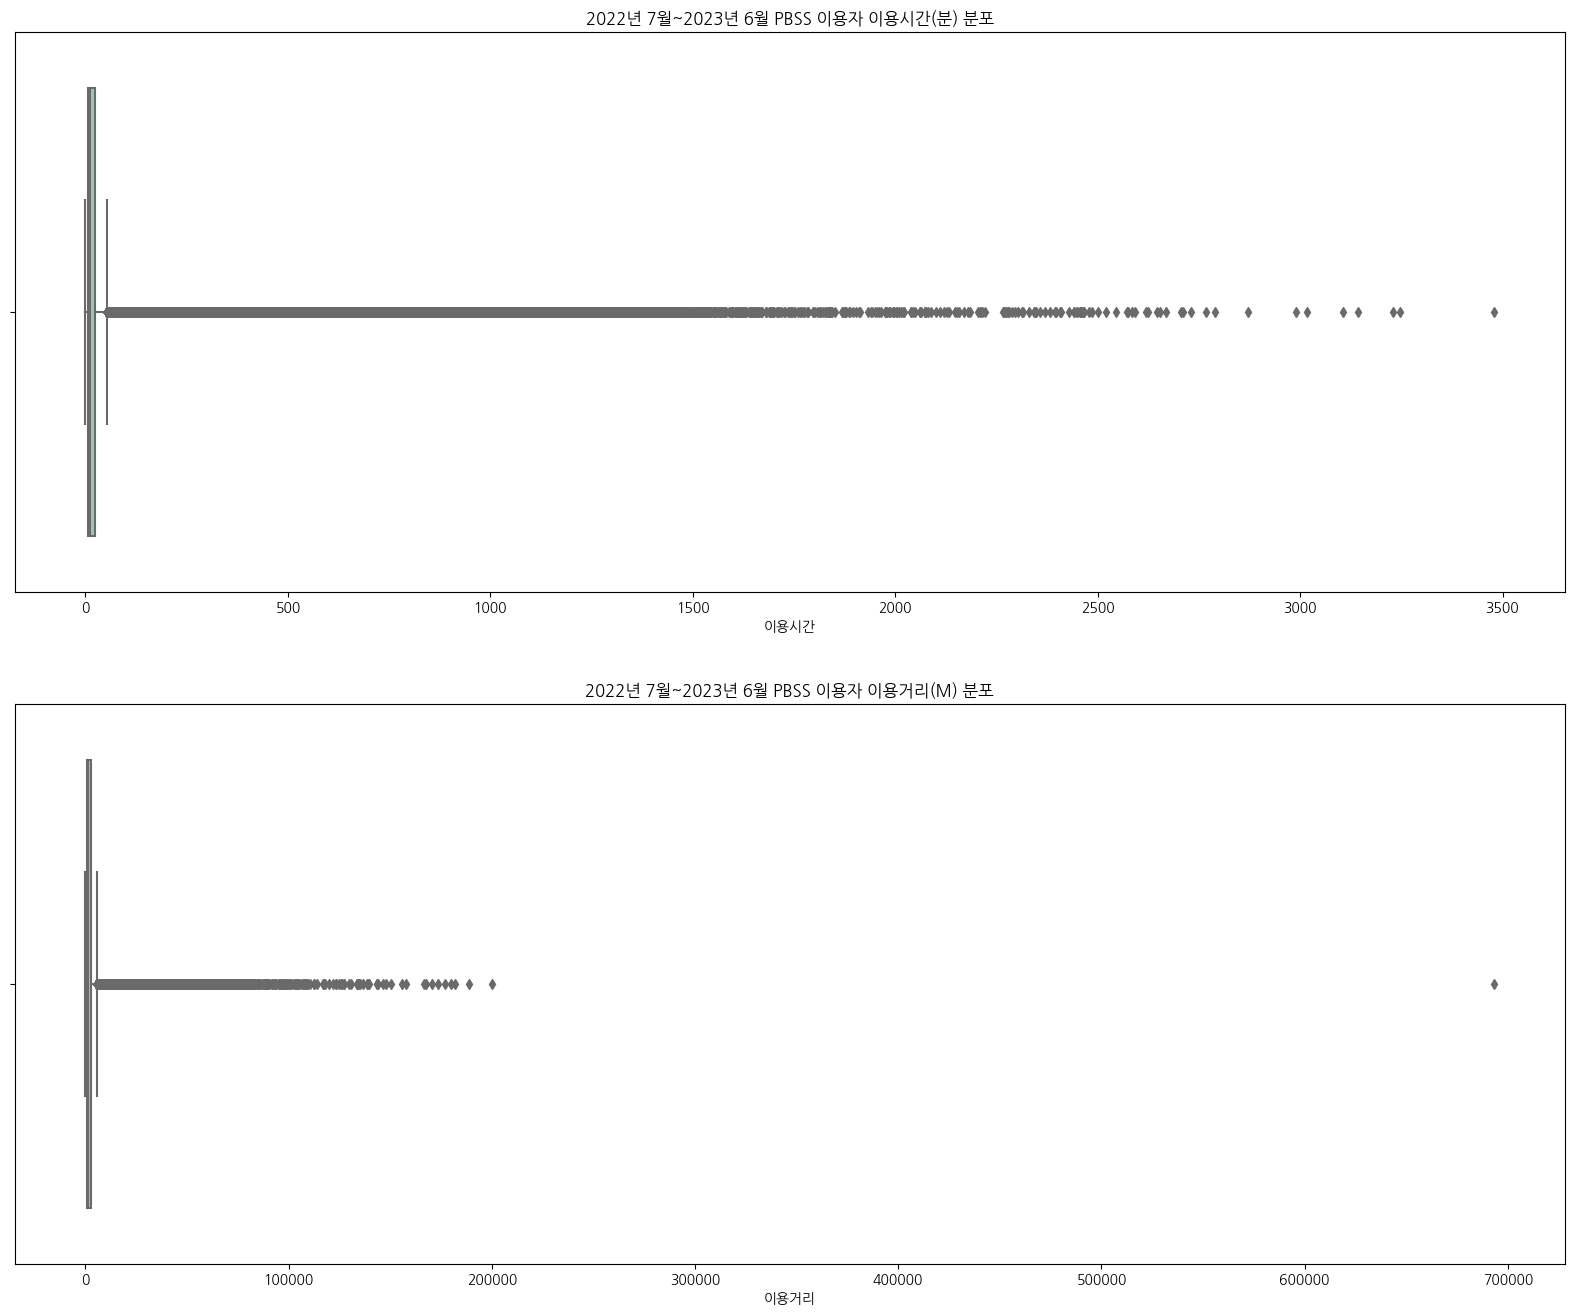

In [24]:
# 이상치가 많고, 분산이 크기에 해당 박스 플롯은 이상치의 분포를 살피는데에 의의를 둔다.
plt.figure(figsize=(20, 16))

plt.subplot(2, 1, 1)
plt.title('2022년 7월~2023년 6월 PBSS 이용자 이용시간(분) 분포')
sns.boxplot(x=data["이용시간"], palette = "Set3")

plt.subplot(2, 1, 2)
plt.title('2022년 7월~2023년 6월 PBSS 이용자 이용거리(M) 분포')
sns.boxplot(x=data["이용거리"], palette = "Set3")

In [25]:
# 1430972 / 45656523 전체 3.1퍼센트에 해당하는 데이터이다.
data[(data['이용시간'] <= 1) & (data['대여대여소번호']==data['반납대여소번호'])]

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2023-06-01 00:00:04,4652,신사두산위브2차아파트 앞,2023-06-01 00:00:07,4652,신사두산위브2차아파트 앞,0,0.0
1,2023-06-01 00:00:09,4162,노량진1동 청소년독서실,2023-06-01 00:00:11,4162,노량진1동 청소년독서실,0,0.0
2,2023-06-01 00:00:15,4886,배명고등학교 건너편,2023-06-01 00:00:29,4886,배명고등학교 건너편,0,0.0
3,2023-06-01 00:00:24,147,마포역 4번출구 뒤,2023-06-01 00:00:41,147,마포역 4번출구 뒤,0,0.0
4,2023-06-01 00:00:33,3517,용마사거리,2023-06-01 00:01:01,3517,용마사거리,0,0.0
...,...,...,...,...,...,...,...,...
45463983,2022-07-31 23:54:12,2265,이수고가차도 남단,2022-07-31 23:54:22,2265,이수고가차도 남단,0,0.0
45463994,2022-07-31 23:55:15,225,앙카라공원 앞,2022-07-31 23:55:48,225,앙카라공원 앞,0,0.0
45464022,2022-07-31 23:58:04,803,한남초교 앞 보도육교,2022-07-31 23:58:37,803,한남초교 앞 보도육교,0,0.0
45464041,2022-07-31 23:58:04,1560,도봉세무서 앞,2022-07-31 23:59:49,1560,도봉세무서 앞,1,0.0


In [26]:
# 1196967 / 45656523 전체 2.6퍼센트에 해당하는 데이터이다.
data[(data['이용시간'] <= 0) & (data['대여대여소번호']==data['반납대여소번호'])]

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2023-06-01 00:00:04,4652,신사두산위브2차아파트 앞,2023-06-01 00:00:07,4652,신사두산위브2차아파트 앞,0,0.0
1,2023-06-01 00:00:09,4162,노량진1동 청소년독서실,2023-06-01 00:00:11,4162,노량진1동 청소년독서실,0,0.0
2,2023-06-01 00:00:15,4886,배명고등학교 건너편,2023-06-01 00:00:29,4886,배명고등학교 건너편,0,0.0
3,2023-06-01 00:00:24,147,마포역 4번출구 뒤,2023-06-01 00:00:41,147,마포역 4번출구 뒤,0,0.0
4,2023-06-01 00:00:33,3517,용마사거리,2023-06-01 00:01:01,3517,용마사거리,0,0.0
...,...,...,...,...,...,...,...,...
45463910,2022-07-31 23:46:29,769,CBS방송국 앞,2022-07-31 23:47:01,769,CBS방송국 앞,0,0.0
45463920,2022-07-31 23:47:37,708,서울출입국관리사무소 앞,2022-07-31 23:48:17,708,서울출입국관리사무소 앞,0,0.0
45463983,2022-07-31 23:54:12,2265,이수고가차도 남단,2022-07-31 23:54:22,2265,이수고가차도 남단,0,0.0
45463994,2022-07-31 23:55:15,225,앙카라공원 앞,2022-07-31 23:55:48,225,앙카라공원 앞,0,0.0


In [27]:
data[(data['이용시간'] <= 1) & (data['대여대여소번호']==data['반납대여소번호']) & (data['이용거리'] == 0)]

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2023-06-01 00:00:04,4652,신사두산위브2차아파트 앞,2023-06-01 00:00:07,4652,신사두산위브2차아파트 앞,0,0.0
1,2023-06-01 00:00:09,4162,노량진1동 청소년독서실,2023-06-01 00:00:11,4162,노량진1동 청소년독서실,0,0.0
2,2023-06-01 00:00:15,4886,배명고등학교 건너편,2023-06-01 00:00:29,4886,배명고등학교 건너편,0,0.0
3,2023-06-01 00:00:24,147,마포역 4번출구 뒤,2023-06-01 00:00:41,147,마포역 4번출구 뒤,0,0.0
4,2023-06-01 00:00:33,3517,용마사거리,2023-06-01 00:01:01,3517,용마사거리,0,0.0
...,...,...,...,...,...,...,...,...
45463920,2022-07-31 23:47:37,708,서울출입국관리사무소 앞,2022-07-31 23:48:17,708,서울출입국관리사무소 앞,0,0.0
45463983,2022-07-31 23:54:12,2265,이수고가차도 남단,2022-07-31 23:54:22,2265,이수고가차도 남단,0,0.0
45463994,2022-07-31 23:55:15,225,앙카라공원 앞,2022-07-31 23:55:48,225,앙카라공원 앞,0,0.0
45464022,2022-07-31 23:58:04,803,한남초교 앞 보도육교,2022-07-31 23:58:37,803,한남초교 앞 보도육교,0,0.0


이용 시간이 1분 미만이며, 대여 장소와 반납 장소가 같고, 이동거리가 0인 경우는 (자전거 대여하고 전혀 움직이지 않은 채 다시 반납한 경우)<br>

1245806건으로 전체 2.7%에 해당한다.<br>

이용 시간이 1분 미만이며, 대여 장소와 반납 장소가 같고, 이동거리가 0이 아닌 경우는 (자전거 대여하고 아주 잠시 탑승했거나, 이동거리 데이터에 오류가 있는 경우)<br>

1430972건으로 전체 3.1퍼센트에 해당하는 데이터이다.<br>

이용시간이 1분이 넘어가면 잠재적 PBSS 이용자에게 영향이 있을 것이고, 자전거라는 이동수단 특성상 제법 긴 거리를 이동할 수 있는 유의미한 시간이라 간주하였고,<br>

이용 시간이 1분 미만이며, 대여 장소와 반납 장소가 같은 경우는 잠재적 이용자에게 영향이 없을 것이라 판단하여 이상치로 간주하여 제거하기로 한다.<br>

In [28]:
drop_index = data[(data['이용시간'] <= 1) & (data['대여대여소번호']==data['반납대여소번호'])].index

In [29]:
data.drop(drop_index, axis=0).reset_index(drop=True)

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2023-06-01 00:00:11,1001,광진교 남단 사거리(천호공원 방면),2023-06-01 00:02:22,1002,해공공원(천호동),2,350.42
1,2023-06-01 00:00:12,2331,동영문화센터앞,2023-06-01 00:02:36,2357,르네상스호텔사거리 역삼지하보도 3번출구 앞 (더 오번 빌딩 명동칼국수 앞),2,0.00
2,2023-06-01 00:00:15,4362,행당중학교 후문,2023-06-01 00:03:05,4362,행당중학교 후문,2,0.00
3,2023-06-01 00:00:25,530,청계벽산아파트 앞,2023-06-01 00:03:10,550,서울시설공단 앞,2,0.00
4,2023-06-01 00:00:57,475,DDP 패션몰,2023-06-01 00:03:14,4765,동대문디자인플라자,2,210.00
...,...,...,...,...,...,...,...,...
44033216,2022-07-31 16:35:34,845,용산 선인상가,2022-08-01 07:39:16,849,삼각지 자이아파트,903,12879.57
44033217,2022-07-31 09:22:51,2613,잠실나들목,2022-08-01 08:55:39,2613,잠실나들목,1412,7750.00
44033218,2022-07-31 09:23:52,2613,잠실나들목,2022-08-01 08:56:01,2613,잠실나들목,1412,6304.07
44033219,2022-07-31 11:42:25,4005,중계2차 한화꿈에그린 101동 인근,2022-08-01 09:40:42,2904,중계3차청구아파트,1318,10948.96


# 대여소 데이터 분석

In [3]:
office = pd.read_csv("rentaloffice(2306).csv", encoding='cp949')

In [31]:
office.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015-01-07,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07,11.0,11.0,QR


In [32]:
office['설치시기'] = pd.to_datetime(office['설치시기'])

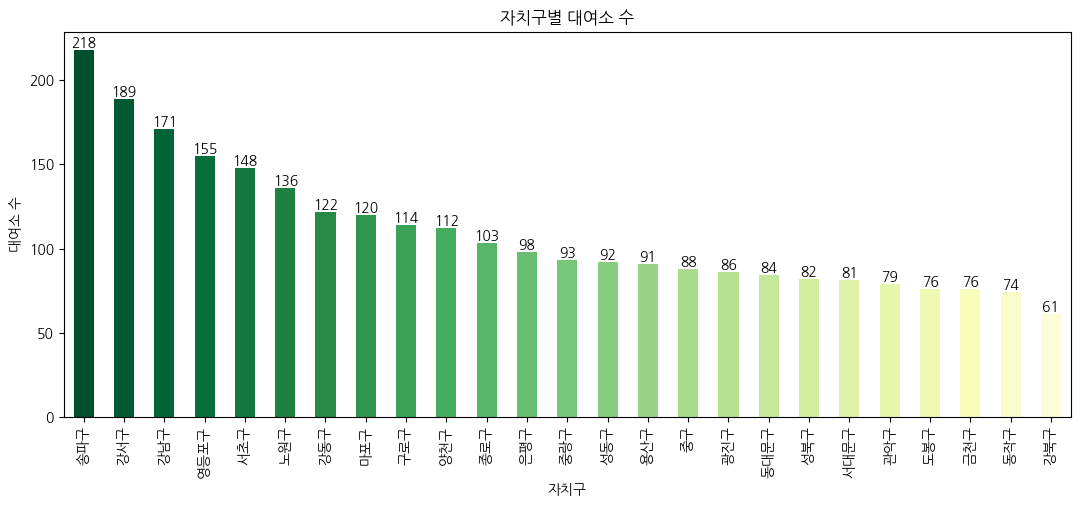

In [33]:
# 그래프의 크기 설정
plt.figure(figsize=(13, 5))

# 컬러맵 불러오기
colors = sns.color_palette("YlGn", len(office['자치구'].value_counts()))
colors = colors[::-1]

# 자치구의 대여소 수 (내림차순 정렬)
value_counts = office['자치구'].value_counts()

ax = value_counts.plot(kind='bar', color=colors)

# 막대 위에 대여소 수 표기
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('자치구별 대여소 수 (2023년 6월 기준)')
plt.xlabel('자치구')
plt.ylabel('대여소 수')

plt.show()

2023년 6월 기준 서울시엔 2749개의 대여소가 존재하고, 송파구 내에는 전체 약 8%인 218개의 대여소가 존재한다.<br>

송파구, 강서구, 강남구, 영등포구, 서초구 순으로 대여소가 많은 것을 볼 수 있다.

In [34]:
district_list = list(office['자치구'].unique())
print(district_list, len(district_list)) 

['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'] 25


In [35]:
# 각 지역구 별 대여소 번호를 office_by_district 변수에 딕셔너리 형태로 저장. (key: 자치구, values: 대여소번호 리스트)

office_by_district = dict(zip(district_list, [[] for i in range(25)]))

for i in range(len(office)):
    x = office.iloc[i]['자치구']
    office_by_district[x].append(office.iloc[i]['대여소번호'])

In [36]:
#print(office_by_district)

In [53]:
def matching_district(x):
    for district_name in list(office_by_district.keys()):
        for i in range(len(office_by_district[district_name])):
            if x == office_by_district[district_name][i]:
                return district_name   

In [54]:
matching_district(3305) 

'관악구'

In [55]:
# 시간 아주 아주 오래 걸림
data['자치구'] = data['대여대여소번호'].apply(matching_district)

In [56]:
data['자치구'].value_counts()

강서구     5171050
송파구     4158474
영등포구    3707871
노원구     2666774
양천구     2636687
마포구     2283395
광진구     2158692
강동구     1984560
구로구     1780523
성동구     1772529
동대문구    1584339
종로구     1572644
서초구     1374993
강남구     1374733
중랑구     1276355
관악구     1161202
은평구     1150778
성북구     1102505
중구      1073788
동작구      965359
도봉구      944886
용산구      944157
서대문구     907246
금천구      783318
강북구      655051
Name: 자치구, dtype: int64

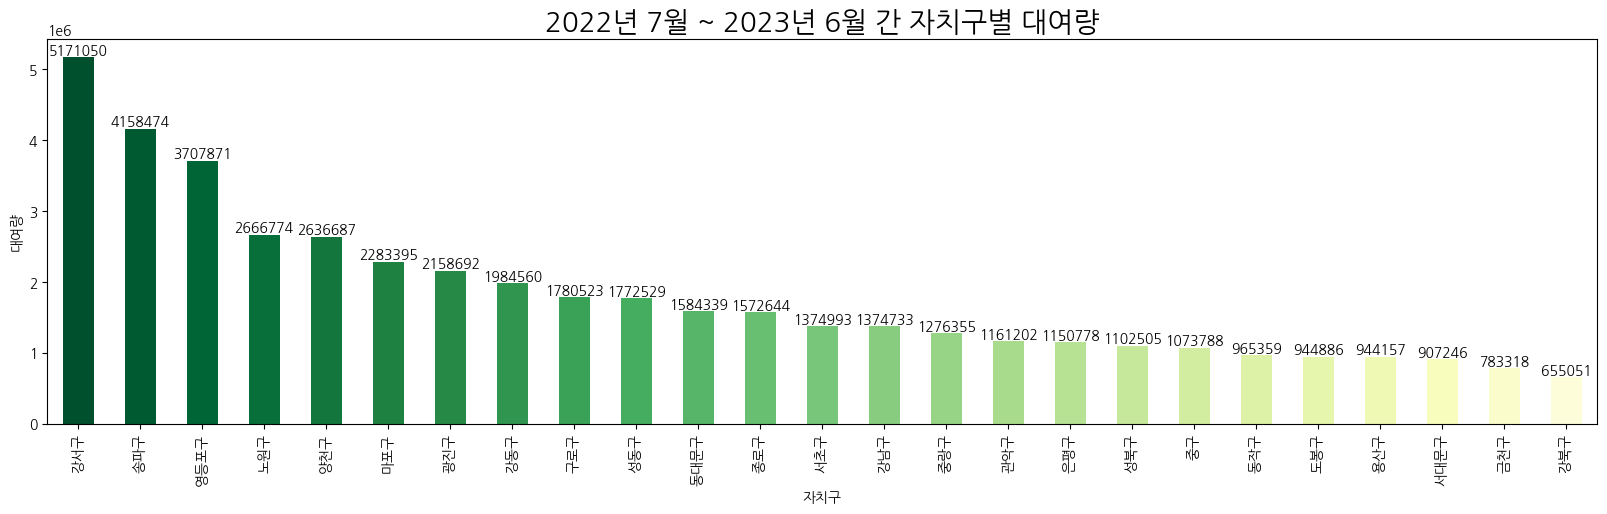

In [59]:
# 그래프의 크기 설정
plt.figure(figsize=(20, 5))

# 컬러맵 불러오기
colors = sns.color_palette("YlGn", len(data['자치구'].value_counts()))
colors = colors[::-1]

# 자치구의 대여소 수 (내림차순 정렬)
value_counts = data['자치구'].value_counts()

ax = value_counts.plot(kind='bar', color=colors)

# 막대 위에 대여소 수 표기
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('2022년 7월 ~ 2023년 6월 간 자치구별 대여량', fontsize=20)
plt.xlabel('자치구')
plt.ylabel('대여량')

plt.show()

1년간 자치구별 대여량 상위 3개 구는 강서구, 송파구, 영등포구이다. <br>

대여소 개수 3위와 5위인 강남구와 서초구가 대여량은 각각 13위와 14위인 것은 의외였다.

In [61]:
data['월'] = data['대여일시'].dt.month
data['시간대'] = data['대여일시'].dt.hour
# 월요일 = 0 ~ 일요일 =  6
data['요일'] = data['대여일시'].dt.weekday

In [66]:
def weekday_weekend(x):
    if x==5:
        return 1
    elif x==6:
        return 1
    else:
        return 0

In [73]:
data['평일주말여부'] = data['요일'].apply(weekday_weekend)

In [74]:
data.tail()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,자치구,월,시간대,요일,평일주말여부
45464188,2022-07-31 16:35:34,845,용산 선인상가,2022-08-01 07:39:16,849,삼각지 자이아파트,903,12879.57,용산구,7,16,6,1
45464189,2022-07-31 09:22:51,2613,잠실나들목,2022-08-01 08:55:39,2613,잠실나들목,1412,7750.00,송파구,7,9,6,1
45464190,2022-07-31 09:23:52,2613,잠실나들목,2022-08-01 08:56:01,2613,잠실나들목,1412,6304.07,송파구,7,9,6,1
45464191,2022-07-31 11:42:25,4005,중계2차 한화꿈에그린 101동 인근,2022-08-01 09:40:42,2904,중계3차청구아파트,1318,10948.96,노원구,7,11,6,1
45464192,2022-07-31 21:13:01,905,구파발역 2번출구,2022-08-01 11:40:30,921,신도고등학교,867,1010.00,은평구,7,21,6,1


# 데이터 중간 백업 / 불러오기

In [ ]:
# 저장

In [98]:
data.to_csv("data.csv", mode='w')

In [72]:
data_s.to_csv("data_s.csv", mode='w')

In [66]:
office_s.to_csv("office_s.csv", mode='w')

In [ ]:
# 불러오기

In [33]:
office = pd.read_csv("rentaloffice(2306).csv", encoding='cp949')

In [2]:
office_s = pd.read_csv("office_s.csv")

In [3]:
data_s = pd.read_csv("data_s.csv")

In [4]:
data_s['대여일시'] = pd.to_datetime(data_s['대여일시'])

In [5]:
data_s['반납일시'] = pd.to_datetime(data_s['반납일시'])

In [8]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790512 entries, 0 to 4790511
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Unnamed: 0   int64         
 1   대여일시         datetime64[ns]
 2   대여대여소번호      int64         
 3   대여대여소명       object        
 4   반납일시         datetime64[ns]
 5   반납대여소번호      int64         
 6   반납대여소명       object        
 7   이용시간         int64         
 8   이용거리         float64       
 9   자치구          object        
 10  월            int64         
 11  시간대          int64         
 12  요일           int64         
 13  평일주말여부       int64         
 14  대여일시(1시간단위)  object        
 15  반납일시(1시간단위)  object        
dtypes: datetime64[ns](2), float64(1), int64(8), object(5)
memory usage: 584.8+ MB


# 송파구 데이터 분석

In [ ]:
office[office['자치구']=='송파구']

2022년 7월~2023년 6월 기준 데이터로 분석이 이루어지기 때문에, 2022년 7월 이후에 설치된 대여소는 유념한 채 분석을 진행한다.

In [38]:
office[office['자치구']=='송파구'].sort_values(by='설치시기').tail(15)

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD,QR,운영방식
2614,5758,올림픽선수기자촌아파트 123동 근처,송파구,송파구 방이동 89-2,37.510643,127.131676,2022-09-01,NaN,10.0,QR
2613,5756,극동아파트,송파구,송파구 풍납동 436,37.526180,127.116760,2022-09-01,NaN,10.0,QR
2615,5759,풍납근린공원,송파구,송파구 풍납동 70-18,37.539139,127.121620,2022-09-22,NaN,6.0,QR
2612,5760,풍납사거리 성내유수지,송파구,풍납동 413-1,37.527653,127.119301,2022-10-04,NaN,8.0,QR
2617,5763,세륜초등학교 건너편,송파구,송파구 방이동 89-28,37.519196,127.132622,2022-10-11,NaN,10.0,QR
2618,5764,한국체육대학교,송파구,송파구 방이동 89-28,37.517960,127.131782,2022-10-11,NaN,8.0,QR
2616,5761,버섯분수대,송파구,송파구 가락동 95-3,37.497555,127.114944,2022-10-12,NaN,10.0,QR
2619,5765,삼전동주민센터 건너편,송파구,송파구 삼전동 86,37.503017,127.092140,2022-10-19,NaN,12.0,QR
2620,5766,북위례1,송파구,송파구 거여동 657-12,37.486931,127.153648,2022-12-23,NaN,15.0,QR
2621,5767,북위례2,송파구,송파구 거여동 657-12,37.484833,127.149918,2022-12-23,NaN,15.0,QR


In [75]:
data_s = data[(data['대여대여소번호'].isin(office_by_district['송파구'])) | (data['반납대여소번호'].isin(office_by_district['송파구']))]
data_s

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,자치구,월,시간대,요일,평일주말여부
2,2023-06-01 00:00:15,4886,배명고등학교 건너편,2023-06-01 00:00:29,4886,배명고등학교 건너편,0,0.00,송파구,6,0,3,0
21,2023-06-01 00:00:10,2632,석촌고분역 2번 출구,2023-06-01 00:03:37,2601,석촌호수 아뜰리에,3,553.24,송파구,6,0,3,0
46,2023-06-01 00:02:39,1248,방이초등학교,2023-06-01 00:05:47,1268,몽촌토성역 1번출구 옆,3,730.00,송파구,6,0,3,0
166,2023-06-01 00:05:54,1212,송파역 2번 출구앞,2023-06-01 00:09:41,4867,가락대림아파트 앞,3,570.00,송파구,6,0,3,0
168,2023-06-01 00:00:53,4864,송파사거리,2023-06-01 00:09:48,1262,송파여성문화회관 앞,8,1260.00,송파구,6,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45464153,2022-07-31 23:59:54,1243,문정 법조단지7,2022-08-01 00:24:37,1229,송파체육문화회관 앞,24,3610.00,송파구,7,23,6,1
45464157,2022-07-31 23:57:48,2642,마천동 성내천 쉼터,2022-08-01 00:28:07,3664,맥도날드 서울둔촌DT점 앞,30,5559.82,송파구,7,23,6,1
45464162,2022-07-31 23:58:20,1044,굽은다리역,2022-08-01 00:43:19,1295,잠실역 8번출구,44,7386.43,강동구,7,23,6,1
45464189,2022-07-31 09:22:51,2613,잠실나들목,2022-08-01 08:55:39,2613,잠실나들목,1412,7750.00,송파구,7,9,6,1


In [76]:
data_s.reset_index(drop=True, inplace=True)
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790512 entries, 0 to 4790511
Data columns (total 13 columns):
 #   Column   Dtype         
---  ------   -----         
 0   대여일시     datetime64[ns]
 1   대여대여소번호  int64         
 2   대여대여소명   object        
 3   반납일시     datetime64[ns]
 4   반납대여소번호  int64         
 5   반납대여소명   object        
 6   이용시간     int64         
 7   이용거리     float64       
 8   자치구      object        
 9   월        int64         
 10  시간대      int64         
 11  요일       int64         
 12  평일주말여부   int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(3)
memory usage: 475.1+ MB


# 송파구 내 대여소 별 평균 대여량 | 평균 반납량 | 평균 재고량 구하기

In [18]:
# 단위시간 당 평균 자전거 대여/반납 수를 구하기 위해, 단위시간 별로 그룹핑하는 컬럼 생성

data_s['대여일시(1시간단위)'] = data_s['대여일시'].dt.floor('H').dt.strftime('%Y-%m-%d %H')
data_s['반납일시(1시간단위)'] = data_s['반납일시'].dt.floor('H').dt.strftime('%Y-%m-%d %H')

In [9]:
# 각 대여소 별, 시간대 별 대여량
return_grouping = data_s.groupby(['반납대여소번호', '반납일시(1시간단위)']).size().reset_index(name='반납량')
rent_grouping = data_s.groupby(['대여대여소번호', '대여일시(1시간단위)']).size().reset_index(name='대여량')

rent_grouping

,대여대여소번호,대여일시(1시간단위),대여량
0,102,2022-07-18 19,1
1,102,2022-07-28 20,1
2,102,2023-02-24 15,1
3,102,2023-06-01 17,1
4,103,2022-07-08 19,1
...,...,...,...
1448930,6053,2023-01-29 15,1
1448931,6053,2023-03-11 19,1
1448932,6053,2023-05-18 19,1
1448933,6054,2023-04-25 01,1


In [10]:
# 각 대여소 별 평균대여량/반납량
avg_return = return_grouping.groupby('반납대여소번호')['반납량'].mean().reset_index(name='평균반납량')
avg_rent = rent_grouping.groupby('대여대여소번호')['대여량'].mean().reset_index(name='평균대여량')

In [30]:
avg_rent.describe()

,대여대여소번호,평균대여량
count,2068.000000,2068.000000
mean,2268.430368,1.382303
std,1564.465726,1.006871
min,102.000000,1.000000
25%,864.750000,1.000000
50%,2089.500000,1.080000
75%,3642.250000,1.250000
max,6054.000000,16.755516


In [32]:
avg_rent.sort_values(by='평균대여량', ascending=False)

,대여대여소번호,평균대여량
667,1210,16.755516
1331,2622,12.063559
1317,2608,11.883090
2050,5768,9.392846
1329,2620,9.014719
...,...,...
890,1572,1.000000
889,1571,1.000000
888,1569,1.000000
887,1565,1.000000


In [33]:
avg_return.sort_values(by='평균반납량', ascending=False)

,반납대여소번호,평균반납량
613,1210,16.491999
1249,2608,12.182160
1263,2622,11.612245
1948,5768,10.077960
1261,2620,9.806752
...,...,...
829,1574,1.000000
828,1573,1.000000
827,1571,1.000000
826,1569,1.000000


In [37]:
office_s = office.copy()[office['자치구']=='송파구']
office_s.drop(['설치시기', 'LCD', 'QR', '운영방식'], axis=1, inplace=True)
office_s

,대여소번호,대여소명,자치구,상세주소,위도,경도
2409,1201,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545
2410,1203,밀리아나2빌딩 앞,송파구,서울특별시 송파구 송파대로28길 24,37.493729,127.120621
2411,1204,거여역 3번출구,송파구,서울특별시 송파구 오금로 지하 499,37.493343,127.144730
2412,1205,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373
2413,1206,9호선종합운동장역 9번출구,송파구,서울특별시 송파구 올림픽로 지하 23,37.511280,127.078239
...,...,...,...,...,...,...
2622,5768,방이삼거리,송파구,송파구 방이동 66-3,37.512291,127.108254
2623,5770,남위례1,송파구,송파구 장지동 917-12,37.475052,127.133041
2624,5772,마천사거리3,송파구,송파구 마천동 118-24,37.498371,127.146957
2625,5773,송파시그니처롯데캐슬,송파구,송파구 거여동 695,37.497143,127.146416


In [38]:
office_s = pd.merge(office_s, avg_return, how='left', left_on='대여소번호', right_on='반납대여소번호')
office_s = pd.merge(office_s, avg_rent, how='left', left_on='대여소번호', right_on='대여대여소번호')
office_s.drop(['반납대여소번호', '대여대여소번호'], axis=1, inplace=True)
office_s

,대여소번호,대여소명,자치구,상세주소,위도,경도,반납대여소번호,평균반납량,대여대여소번호,평균대여량
0,1201,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,1201,4.295380,1201,4.373796
1,1203,밀리아나2빌딩 앞,송파구,서울특별시 송파구 송파대로28길 24,37.493729,127.120621,1203,4.097781,1203,4.436277
2,1204,거여역 3번출구,송파구,서울특별시 송파구 오금로 지하 499,37.493343,127.144730,1204,3.440087,1204,3.503360
3,1205,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,1205,3.774452,1205,4.311004
4,1206,9호선종합운동장역 9번출구,송파구,서울특별시 송파구 올림픽로 지하 23,37.511280,127.078239,1206,3.185672,1206,3.429213
...,...,...,...,...,...,...,...,...,...,...
213,5768,방이삼거리,송파구,송파구 방이동 66-3,37.512291,127.108254,5768,10.077960,5768,9.392846
214,5770,남위례1,송파구,송파구 장지동 917-12,37.475052,127.133041,5770,2.176849,5770,2.255079
215,5772,마천사거리3,송파구,송파구 마천동 118-24,37.498371,127.146957,5772,1.443595,5772,1.494970
216,5773,송파시그니처롯데캐슬,송파구,송파구 거여동 695,37.497143,127.146416,5773,1.274924,5773,1.299035


In [42]:
office_s['평균재고량'] = office_s['평균반납량'] - office_s['평균대여량']

In [44]:
office_s.describe()

,대여소번호,위도,경도,평균반납량,평균대여량,평균재고량
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,3095.307339,37.501421,127.120754,3.360931,3.390923,-0.029992
std,1641.796347,0.015374,0.018799,2.098720,2.061362,0.187757
min,1201.000000,37.471298,127.071373,1.190777,1.299035,-0.636078
25%,1271.750000,37.488873,127.109278,1.980368,2.035365,-0.118775
50%,2641.500000,37.501574,127.121689,2.698512,2.753933,-0.042823
75%,4853.500000,37.512260,127.134121,4.262048,4.249486,0.040012
max,5774.000000,37.539139,127.159668,16.491999,16.755516,0.792033


In [43]:
office_s.sort_values(by='평균재고량', ascending=False)

,대여소번호,대여소명,자치구,상세주소,위도,경도,평균반납량,평균대여량,평균재고량
92,2620,송파나루역 4번 출구옆,송파구,송파구 송파동 3-15,37.509979,127.112312,9.806752,9.014719,0.792033
213,5768,방이삼거리,송파구,송파구 방이동 66-3,37.512291,127.108254,10.077960,9.392846,0.685114
182,4876,삼전동주민센터 앞,송파구,송파구 삼전동 62,37.502914,127.092537,3.840439,3.367749,0.472689
146,4483,잠실나들목4,송파구,잠실동24,37.516323,127.084343,4.860474,4.400109,0.460365
15,1220,잠실근린공원,송파구,서울특별시 송파구 백제고분로15길 7,37.505692,127.084038,4.895126,4.438307,0.456819
...,...,...,...,...,...,...,...,...,...
98,2627,문정시영아파트 5동 앞 공원,송파구,송이로 31길 56,37.491123,127.135109,1.776181,2.208315,-0.432134
158,4500,풍납나들목,송파구,풍납동 425,37.528652,127.108666,3.164269,3.611191,-0.446922
94,2622,올림픽공원역 3번출구,송파구,송파구 방이동 89-28,37.516258,127.130592,11.612245,12.063559,-0.451314
3,1205,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,3.774452,4.311004,-0.536552


In [45]:
office_s.sort_values(by='평균재고량')

,대여소번호,대여소명,자치구,상세주소,위도,경도,평균반납량,평균대여량,평균재고량
167,4457,아산병원 기숙사 부근,송파구,올림픽로43길 88,37.524780,127.109131,7.790286,8.426364,-0.636078
3,1205,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,3.774452,4.311004,-0.536552
94,2622,올림픽공원역 3번출구,송파구,송파구 방이동 89-28,37.516258,127.130592,11.612245,12.063559,-0.451314
158,4500,풍납나들목,송파구,풍납동 425,37.528652,127.108666,3.164269,3.611191,-0.446922
98,2627,문정시영아파트 5동 앞 공원,송파구,송이로 31길 56,37.491123,127.135109,1.776181,2.208315,-0.432134
...,...,...,...,...,...,...,...,...,...
15,1220,잠실근린공원,송파구,서울특별시 송파구 백제고분로15길 7,37.505692,127.084038,4.895126,4.438307,0.456819
146,4483,잠실나들목4,송파구,잠실동24,37.516323,127.084343,4.860474,4.400109,0.460365
182,4876,삼전동주민센터 앞,송파구,송파구 삼전동 62,37.502914,127.092537,3.840439,3.367749,0.472689
213,5768,방이삼거리,송파구,송파구 방이동 66-3,37.512291,127.108254,10.077960,9.392846,0.685114


# 대여소 별 평균 재고량 시각화

In [13]:
m = folium.Map([37.50630188, 127.1213989], 
               zoom_start=13.5, 
               zoom_control=False, 
               scrollWheelZoom=False,
               dragging=False, 
               tiles="http://mt0.google.com/vt/lyrs=m&hl=ko&x={x}&y={y}&z={z}", attr="Google")

# 색상 맵을 설정.
colormap = linear.RdYlGn_11.scale(min(office_s['평균재고량']), max(office_s['평균재고량']))
color_range = [min(office_s['평균재고량']), max(office_s['평균재고량'])]

# 데이터를 기반으로 Circle을 생성.
for index, row in office_s.iterrows():
    station_name = row['대여소명']
    station_num = row['대여소번호']
    latitude = row['위도']
    longitude = row['경도']
    average_inventory = row['평균재고량']
    detail_address = row['상세주소']

    # 평균 재고량에 따른 색상 및 크기를 설정.
    color = colormap(average_inventory)
    normalized_value = (average_inventory - color_range[0]) / (color_range[1] - color_range[0])

    # Circle 추가.
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f'({station_num}){station_name}<br><br>주소: {detail_address}<br><br>평균 재고량: {average_inventory}',
        tooltip=f'{station_name}<br>평균 재고량: {average_inventory}'
    ).add_to(m)

# 컬러바 추가.
colormap.caption = '평균 재고량'
colormap.add_to(m)

m

# 결과를 HTML 파일로 저장하거나 화면에 표시.
# save_name = '송파구 대여소별 연간 평균 재고량' + '.html'
# m.save(save_name)

Text(0.5, 0, '대여량')

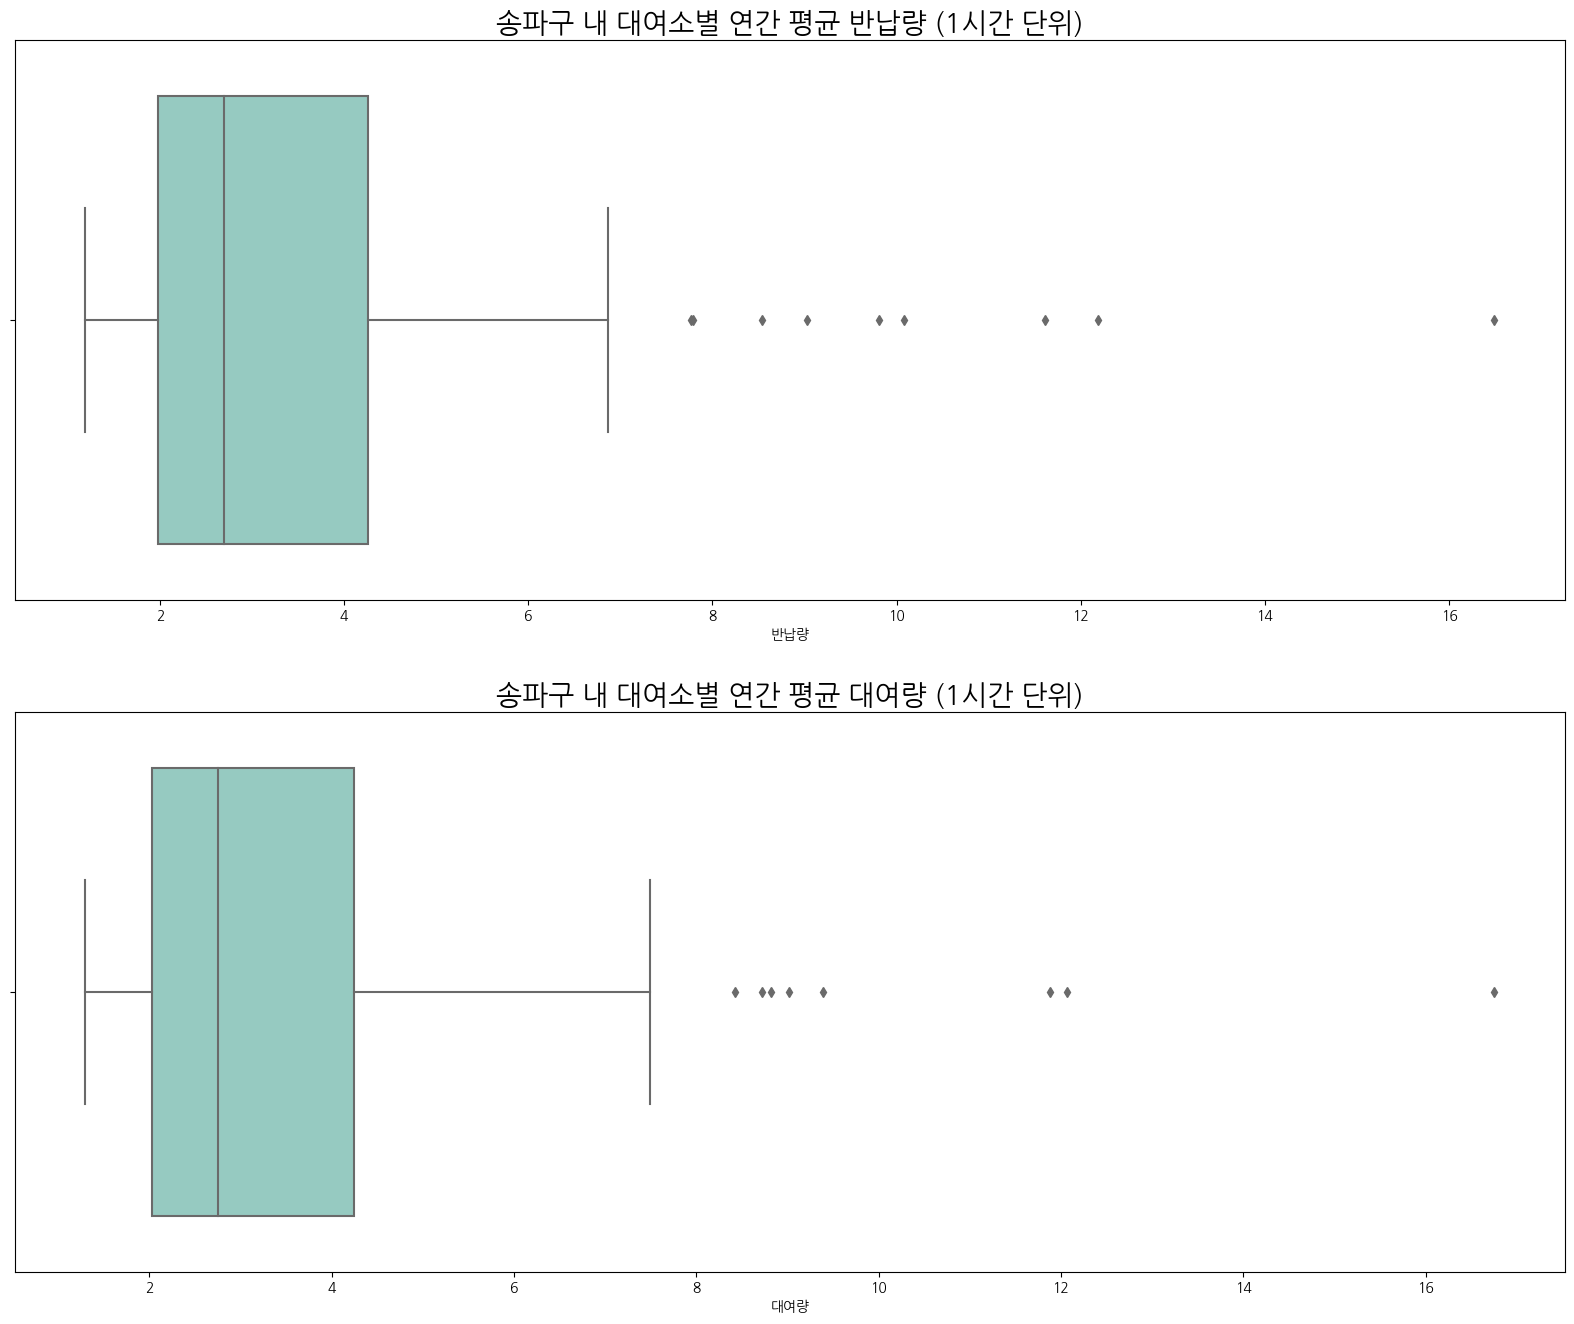

In [69]:
plt.figure(figsize=(20, 16))
plt.subplot(2, 1, 1)
sns.boxplot(x=office_s["평균반납량"], palette = "Set3")
plt.title('송파구 내 대여소별 연간 평균 반납량 (1시간 단위)', fontsize=20)
plt.xlabel('반납량')

plt.subplot(2, 1, 2)
sns.boxplot(x=office_s["평균대여량"], palette = "Set3")
plt.title('송파구 내 대여소별 연간 평균 대여량 (1시간 단위)', fontsize=20)
plt.xlabel('대여량')

In [58]:
office_s.describe()

,대여소번호,위도,경도,평균반납량,평균대여량,평균재고량
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,3095.307339,37.501421,127.120754,3.360931,3.390923,-0.029992
std,1641.796347,0.015374,0.018799,2.098720,2.061362,0.187757
min,1201.000000,37.471298,127.071373,1.190777,1.299035,-0.636078
25%,1271.750000,37.488873,127.109278,1.980368,2.035365,-0.118775
50%,2641.500000,37.501574,127.121689,2.698512,2.753933,-0.042823
75%,4853.500000,37.512260,127.134121,4.262048,4.249486,0.040012
max,5774.000000,37.539139,127.159668,16.491999,16.755516,0.792033


# 송파구 내 *특정 조건을 포함하는* 대여소 별 평균 대여량 | 평균 반납량 | 평균 재고량 구하기
분석하고자 하는 조건은 아래와 같이 구분할 수 있다.
1. 월별
2. 시간대별
3. 요일별
4. 주말여부

원하는 조건별로 평균 지표를 바로 구할 수 있는 포맷을 구축하는 것이 목표

In [6]:
data_s.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790512 entries, 0 to 4790511
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Unnamed: 0   int64         
 1   대여일시         datetime64[ns]
 2   대여대여소번호      int64         
 3   대여대여소명       object        
 4   반납일시         datetime64[ns]
 5   반납대여소번호      int64         
 6   반납대여소명       object        
 7   이용시간         int64         
 8   이용거리         float64       
 9   자치구          object        
 10  월            int64         
 11  시간대          int64         
 12  요일           int64         
 13  평일주말여부       int64         
 14  대여일시(1시간단위)  object        
 15  반납일시(1시간단위)  object        
dtypes: datetime64[ns](2), float64(1), int64(8), object(5)
memory usage: 584.8+ MB


In [31]:
# 여기서 월/시간대/요일/주말여부 추출해서 그룹핑 가능
rent_grouping

,대여대여소번호,대여일시(1시간단위),대여량
0,102,2022-07-18 19:00:00,1
1,102,2022-07-28 20:00:00,1
2,102,2023-02-24 15:00:00,1
3,102,2023-06-01 17:00:00,1
4,103,2022-07-08 19:00:00,1
...,...,...,...
1448930,6053,2023-01-29 15:00:00,1
1448931,6053,2023-03-11 19:00:00,1
1448932,6053,2023-05-18 19:00:00,1
1448933,6054,2023-04-25 01:00:00,1


# 월별 시간대별 그룹핑 -> 평균 대여량 | 평균 반납량 | 평균 재고량

In [12]:
rent_grouping['대여일시(1시간단위)'] = pd.to_datetime(rent_grouping['대여일시(1시간단위)'])
return_grouping['반납일시(1시간단위)'] = pd.to_datetime(return_grouping['반납일시(1시간단위)']) 

In [14]:
return_grouping.groupby([return_grouping['반납대여소번호'], return_grouping['반납일시(1시간단위)'].dt.strftime('%m %H').rename('월 시간대')])['반납량'].mean().reset_index(name='평균반납량')
rent_grouping.groupby([rent_grouping['대여대여소번호'], rent_grouping['대여일시(1시간단위)'].dt.strftime('%m %H').rename('월 시간대')])['대여량'].mean().reset_index(name='평균대여량')

,대여대여소번호,월 시간대,평균대여량
0,102,02 15,1.0
1,102,06 17,1.0
2,102,07 19,1.0
3,102,07 20,1.0
4,103,01 20,1.0
...,...,...,...
141012,6053,01 15,1.0
141013,6053,03 19,1.0
141014,6053,05 19,1.0
141015,6054,04 01,1.0


In [15]:
avg_return_monthly = return_grouping.groupby([return_grouping['반납대여소번호'], return_grouping['반납일시(1시간단위)'].dt.strftime('%m %H').rename('월 시간대')])['반납량'].mean().reset_index(name='평균반납량')
avg_rent_monthly = rent_grouping.groupby([rent_grouping['대여대여소번호'], rent_grouping['대여일시(1시간단위)'].dt.strftime('%m %H').rename('월 시간대')])['대여량'].mean().reset_index(name='평균대여량')

In [71]:
# 월별, 시간대별 통계량을 담은 office_s_monthly 데이터프레임 생성

office_s_monthly = office_s.copy()

In [72]:
office_s_monthly.drop(labels=['Unnamed: 0', '평균반납량', '평균대여량', '평균재고량'], axis=1, inplace=True)

In [73]:
office_s_monthly = office_s_monthly.merge(avg_return_monthly, how='left', left_on='대여소번호', right_on='반납대여소번호')
office_s_monthly = office_s_monthly.merge(avg_rent_monthly, how='outer', left_on=['대여소번호','월 시간대'], right_on=['대여대여소번호', '월 시간대'])
office_s_monthly

,대여소번호,대여소명,자치구,상세주소,위도,경도,반납대여소번호,월 시간대,평균반납량,대여대여소번호,평균대여량
0,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,1201.0,01 00,2.040000,1201.0,2.454545
1,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,1201.0,01 01,3.409091,1201.0,2.333333
2,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,1201.0,01 02,2.653846,1201.0,1.476190
3,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,1201.0,01 03,1.761905,1201.0,1.166667
4,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,1201.0,01 04,1.285714,1201.0,1.428571
...,...,...,...,...,...,...,...,...,...,...,...
141772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 15,NaN,6053.0,1.000000
141773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03 19,NaN,6053.0,1.000000
141774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05 19,NaN,6053.0,1.000000
141775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04 01,NaN,6054.0,1.000000


In [77]:
office_s_monthly.dropna(subset='대여소명', inplace=True)  

In [91]:
office_s_monthly.drop(labels=['반납대여소번호', '대여대여소번호'], axis=1, inplace=True)

In [92]:
office_s_monthly['평균재고량'] = office_s_monthly['평균반납량'] - office_s_monthly['평균대여량']

In [96]:
office_s_monthly.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,월 시간대,평균반납량,평균대여량,평균재고량
0,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,01 00,2.040000,2.454545,-0.414545
1,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,01 01,3.409091,2.333333,1.075758
2,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,01 02,2.653846,1.476190,1.177656
3,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,01 03,1.761905,1.166667,0.595238
4,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,01 04,1.285714,1.428571,-0.142857


In [97]:
office_s_monthly.describe()

,대여소번호,위도,경도,평균반납량,평균대여량,평균재고량
count,59268.000000,59268.000000,59268.000000,59268.000000,58508.000000,58508.000000
mean,3000.866876,37.501477,127.120318,2.983974,3.040834,-0.032504
std,1592.951974,0.015245,0.018778,3.122685,3.131781,1.798995
min,1201.000000,37.471298,127.071373,1.000000,1.000000,-40.892857
25%,1268.000000,37.489330,127.108254,1.307692,1.400000,-0.434524
50%,2635.000000,37.501667,127.121620,1.888889,2.000000,-0.016667
75%,4493.000000,37.512169,127.133697,3.360000,3.416667,0.333333
max,5774.000000,37.539139,127.159668,53.034483,83.620690,38.500000


Text(0.5, 0, '재고량')

C:\Users\lovej\anaconda3\envs\eeg\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\lovej\anaconda3\envs\eeg\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


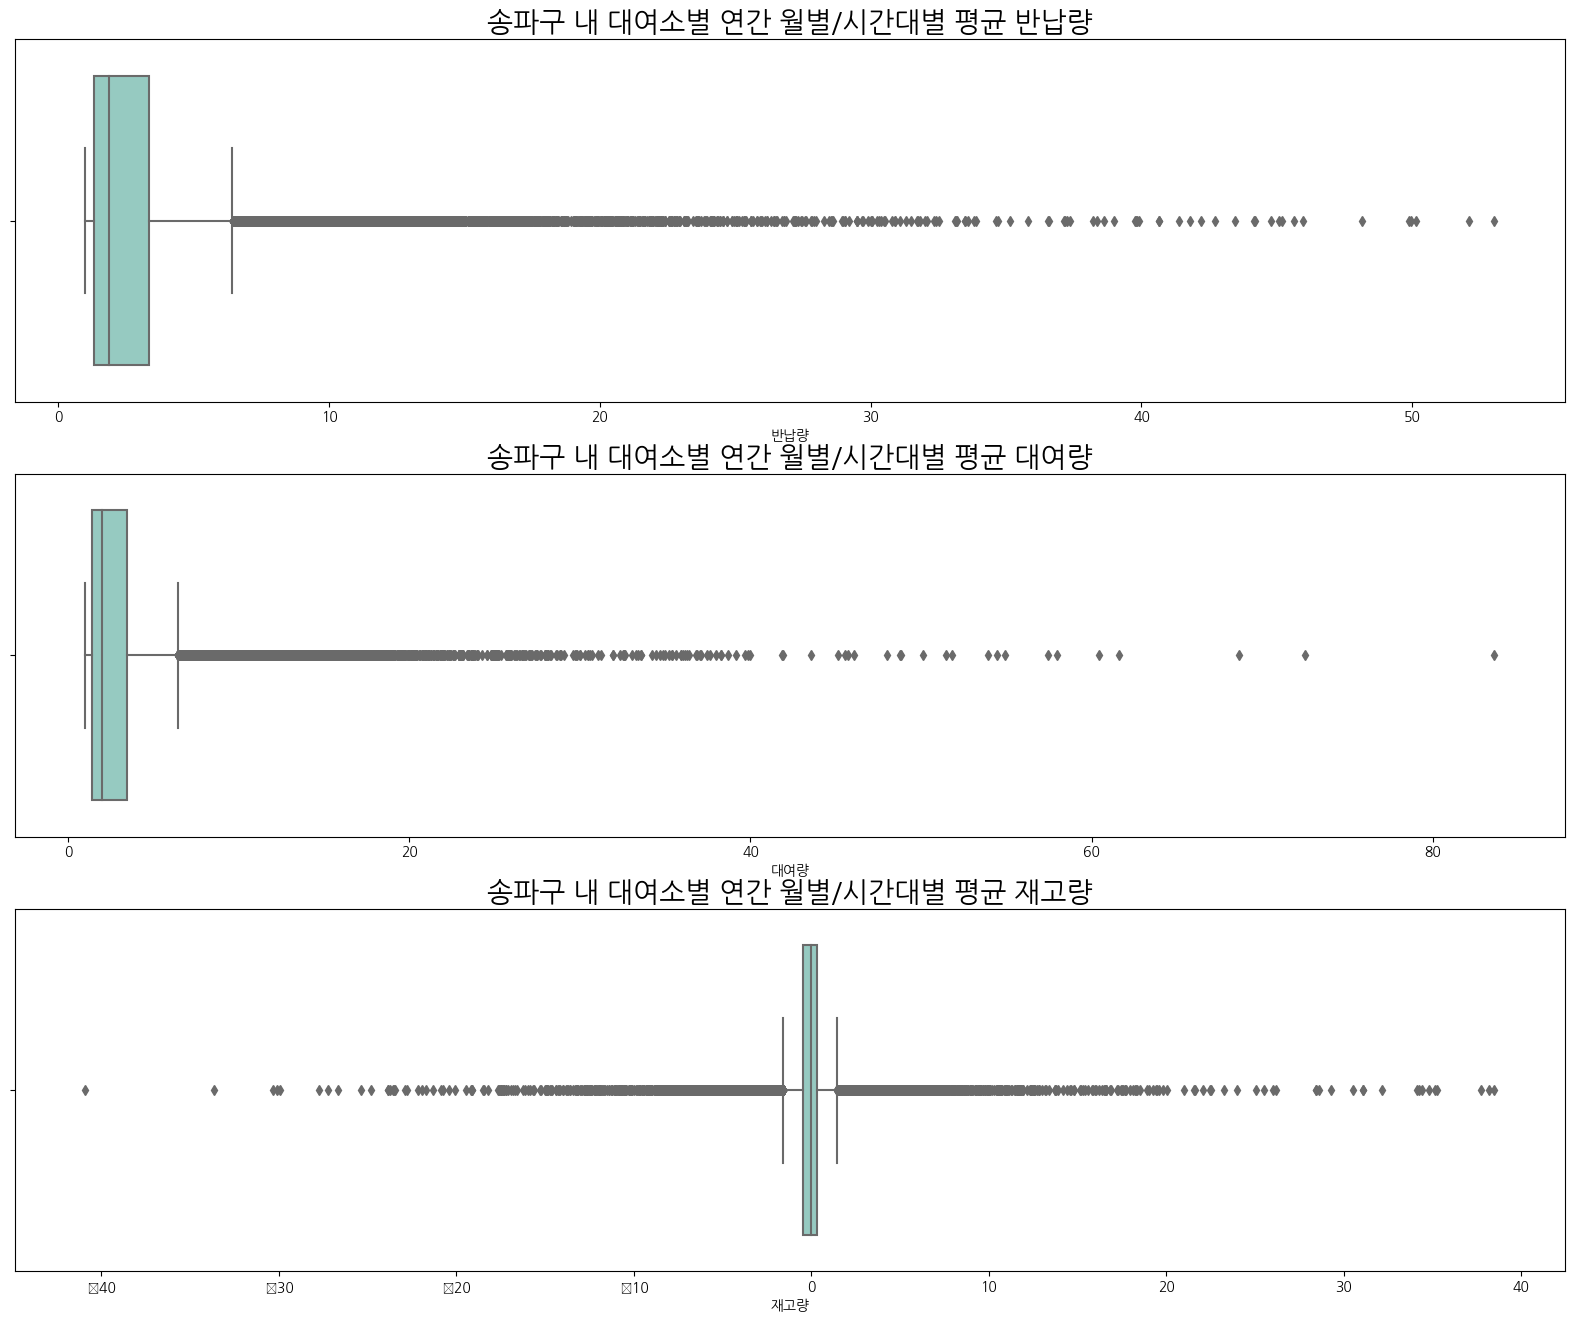

In [101]:
plt.figure(figsize=(20, 16))
plt.subplot(3, 1, 1)
sns.boxplot(x=office_s_monthly["평균반납량"], palette = "Set3")
plt.title('송파구 내 대여소별 연간 월별/시간대별 평균 반납량', fontsize=20)
plt.xlabel('반납량')

plt.subplot(3, 1, 2)
sns.boxplot(x=office_s_monthly["평균대여량"], palette = "Set3")
plt.title('송파구 내 대여소별 연간 월별/시간대별 평균 대여량', fontsize=20)
plt.xlabel('대여량')

plt.subplot(3, 1, 3)
sns.boxplot(x=office_s_monthly["평균재고량"], palette = "Set3")
plt.title('송파구 내 대여소별 연간 월별/시간대별 평균 재고량', fontsize=20)
plt.xlabel('재고량')

이상치로 간주될 수 있는 값들이 아주 많다. 재고 불균형 해소할 방안을 제시할 필요가 있다.

# 현재 시각 기준 원하는 대여소의 평균 재고량을 알아보기

In [103]:
now = dt.datetime.now().strftime('%m %H')
now

'10 17'

In [104]:
# 현재 시간대의 평균 대여/반납/재고량

office_s_monthly_now = office_s_monthly.copy()[office_s_monthly['월 시간대'] == now]
office_s_monthly_now

,대여소번호,대여소명,자치구,상세주소,위도,경도,월 시간대,평균반납량,평균대여량,평균재고량
233,1201.0,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118545,10 17,6.633333,7.931034,-1.297701
521,1203.0,밀리아나2빌딩 앞,송파구,서울특별시 송파구 송파대로28길 24,37.493729,127.120621,10 17,7.633333,9.633333,-2.000000
809,1204.0,거여역 3번출구,송파구,서울특별시 송파구 오금로 지하 499,37.493343,127.144730,10 17,6.172414,5.166667,1.005747
1097,1205.0,종합운동장역 4번출구,송파구,서울특별시 송파구 올림픽로 8,37.510429,127.071373,10 17,8.464286,9.666667,-1.202381
1384,1206.0,9호선종합운동장역 9번출구,송파구,서울특별시 송파구 올림픽로 지하 23,37.511280,127.078239,10 17,4.766667,5.700000,-0.933333
...,...,...,...,...,...,...,...,...,...,...
57779,5759.0,풍납근린공원,송파구,송파구 풍납동 70-18,37.539139,127.121620,10 17,3.230769,2.480000,0.750769
57992,5761.0,버섯분수대,송파구,송파구 가락동 95-3,37.497555,127.114944,10 17,4.500000,2.166667,2.333333
58189,5763.0,세륜초등학교 건너편,송파구,송파구 방이동 89-28,37.519196,127.132622,10 17,2.166667,1.500000,0.666667
58387,5764.0,한국체육대학교,송파구,송파구 방이동 89-28,37.517960,127.131782,10 17,2.166667,3.166667,-1.000000


In [110]:
m = folium.Map([37.50630188, 127.1213989], 
               zoom_start=13.5, 
               zoom_control=False, 
               scrollWheelZoom=False,
               dragging=False, 
               tiles="http://mt0.google.com/vt/lyrs=m&hl=ko&x={x}&y={y}&z={z}", attr="Google")

# 대여소 데이터 여기에 저장
office_data = office_s_monthly_now.copy()

# 색상 맵을 설정.
colormap = linear.RdYlGn_11.scale(-max(abs(min(office_data['평균재고량'])), abs(max(office_data['평균재고량']))), max(abs(min(office_data['평균재고량'])), abs(max(office_data['평균재고량']))))
color_range = [-max(abs(min(office_data['평균재고량'])), abs(max(office_data['평균재고량']))), max(abs(min(office_data['평균재고량'])), abs(max(office_data['평균재고량'])))]

# 데이터를 기반으로 Circle을 생성.
for index, row in office_data.iterrows():
    station_name = row['대여소명']
    station_num = row['대여소번호']
    latitude = row['위도']
    longitude = row['경도']
    average_inventory = row['평균재고량']
    detail_address = row['상세주소']

    # 평균 재고량에 따른 색상 및 크기를 설정.
    color = colormap(average_inventory)
    normalized_value = (average_inventory - color_range[0]) / (color_range[1] - color_range[0])

    # Circle 추가.
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f'({station_num}){station_name}<br><br>주소: {detail_address}<br><br>평균 재고량: {average_inventory}',
        tooltip=f'{station_name}<br>평균 재고량: {average_inventory}'
    ).add_to(m)

# 컬러바 추가.
colormap.caption = '평균 재고량'
colormap.add_to(m)

m

# 결과를 HTML 파일로 저장하거나 화면에 표시.
# save_name = '송파구 대여소별 연간 평균 재고량' + '.html'
# m.save(save_name)

평균재고량이 해당 시간대에 방문했을 때 언제나 기대 재고량이 되는 것이 아니다.

송파구는 다른 자치구에 비해 이용량이 많은 편이고,

또한 해당 평균 재고량이 현저히 낮은 곳을 위주로 이미 효율적인 재배치가 이루어지고 있기 때문에

평균재고량이 상자수염의 최소값 이하인 대여소에 오히려 많은 재고를 배치해두기도 하기 때문이다. 

In [97]:
# 대여소 정보 데이터를 판다스 데이터프레임으로 로드합니다.
office_data = pd.read_csv('office_s.csv')

office_data['대여소번호'] = office_data['대여소번호'].astype(object)

In [101]:
office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  218 non-null    int64  
 1   대여소번호       218 non-null    object 
 2   대여소명        218 non-null    object 
 3   자치구         218 non-null    object 
 4   상세주소        218 non-null    object 
 5   위도          218 non-null    float64
 6   경도          218 non-null    float64
 7   평균반납량       218 non-null    float64
 8   평균대여량       218 non-null    float64
 9   평균재고량       218 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 17.2+ KB


In [106]:
from ipyleaflet import Map, Marker, Popup, basemaps
import pandas as pd

# 클릭한 대여소 번호를 저장할 변수
clicked_station_number = None

# 지도 초기화
m = Map(center=(office_data['위도'].mean(), office_data['경도'].mean()), zoom=13, basemap=basemaps.OpenStreetMap.Mapnik)

# 대여소 정보를 마커로 표시
for _, row in office_data.iterrows():
    marker = Marker(location=(row['위도'], row['경도']), draggable=False)
    popup = Popup(
        location=(row['위도'], row['경도']),
        close_button=False,
        auto_close=False,
        close_on_escape_key=False,
    )
    popup.children = [Marker(location=(row['위도'], row['경도']), title=str(row['대여소번호']))]
    marker.popup = popup
    m.add_layer(marker)

# 클릭 이벤트 처리 함수
def click_event(event, feature, properties):
    global clicked_station_number
    clicked_station_number = properties['title']

m.on_interaction(click_event)

m

Map(center=[37.50142053674312, 127.12075435275229], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [16]:
%%javascript
function onMarkerClick(e) {
    var 대여소번호 = e.target.options.대여소번호;
    // 클릭한 대여소번호를 JavaScript 변수에 저장
    selected_station = 대여소번호;
    // JavaScript 변수를 Python 변수에 전달
    IPython.notebook.kernel.execute("selected_station = " + selected_station);
    // 지도를 닫음
    if (typeof map != 'undefined') {
        map.remove();
    }
}

<IPython.core.display.Javascript object>

In [30]:
# 지도 생성
m = folium.Map([37.50630188, 127.1213989], 
               zoom_start=13.5, 
               zoom_control=False, 
               scrollWheelZoom=False,
               dragging=False, 
               tiles="http://mt0.google.com/vt/lyrs=m&hl=ko&x={x}&y={y}&z={z}", attr="Google")

# 대여소 정보를 지도에 추가
for index, row in office_s.iterrows():
    folium.Marker([row['위도'], row['경도']], popup=row['대여소명']).add_to(m)

# 클릭 이벤트 핸들러 함수
click_script = """
function onMarkerClick(e) {
    var 대여소번호 = e.target.options.대여소번호;
    // 클릭한 대여소번호를 JavaScript 변수에 저장
    selected_station = 대여소번호;
    // JavaScript 변수를 Python 변수에 전달
    IPython.notebook.kernel.execute("selected_station = " + selected_station);
    // 지도를 닫음
    if (typeof map != 'undefined') {
        map.remove();
    }
}
"""

# 마커에 클릭 이벤트 핸들러 연결
for index, row in office_s.iterrows():
    folium.Marker([row['위도'], row['경도']], popup=row['대여소명'], options={'대여소번호': row['대여소번호']}).add_to(m)

m.get_root().html.add_child(folium.Element(f'<script>{click_script}</script>'))

# 선택된 대여소번호를 저장할 변수
selected_station = None

# IPython을 사용하는 경우 Python 변수에 저장된 대여소번호 출력
from IPython.display import display, HTML
display(HTML("<div id='selected_station'></div>"))

# JavaScript 코드를 출력
display(HTML(f'<script>{click_script}</script>'))

# 출력 부분
display(HTML("<div id='selected_station'></div>"))

